In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


**Loading the Dataset**

In [2]:
df_sub = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [3]:
df_sub.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [4]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
print('No. of rows in training set: {} '.format(df_train.shape[0]))
print('No. of columns in training set: {} '.format(df_train.shape[1]))

No. of rows in training set: 8693 
No. of columns in training set: 14 


In [7]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
##Basic eda of training set
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
## Dropping columns of dataset not needed for training model
df_train = df_train.drop(['PassengerId', 'Name'], axis = 1)
df_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [10]:
df_train.nunique()

HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Transported        2
dtype: int64

In [11]:
col_names = df_train.columns
#col_names[[1]]

for col_name in col_names:
    print('No. of null values in {} : {}'.format(col_name, df_train[col_name].isnull().sum()))

No. of null values in HomePlanet : 201
No. of null values in CryoSleep : 217
No. of null values in Cabin : 199
No. of null values in Destination : 182
No. of null values in Age : 179
No. of null values in VIP : 203
No. of null values in RoomService : 181
No. of null values in FoodCourt : 183
No. of null values in ShoppingMall : 208
No. of null values in Spa : 183
No. of null values in VRDeck : 188
No. of null values in Transported : 0


**Handling Categorical data points**

In [12]:
cat_cols = df_train.select_dtypes(include=['object', 'category']).columns
cat_cols
#type(df_train['Transported'])

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'], dtype='object')

In [13]:
##Encoding categorical columns
from sklearn.preprocessing import LabelEncoder
lb_en = LabelEncoder()

for col in cat_cols:
    df_train[col] = lb_en.fit_transform(df_train[col])
    
df_train['Transported'] = lb_en.fit_transform(df_train['Transported'])
    
df_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,146,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,0,1,5280,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,0,0,5285,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,1,0,2131,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


**Importing Libraries**

In [14]:
import tensorflow as tf
import tensorflow_decision_forests as tf_df
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

2024-02-28 09:30:27.823009: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 09:30:27.823199: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 09:30:28.013716: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Diving the datasaet into Training and Test Dataset**

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_cval = train_test_split(df_train, test_size = 0.4, random_state = 0)
#print(X_train.head())
#print(X_cval.head())

X_train = tf_df.keras.pd_dataframe_to_tf_dataset(X_train, label='Transported')
X_cval = tf_df.keras.pd_dataframe_to_tf_dataset(X_cval, label='Transported')
#print(len(X_train))
#print(len(df_train))
#len(X_cval)
#X_train

In [16]:
#checking requirements
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tf_df.__version__)

TensorFlow v2.15.0
TensorFlow Decision Forests v1.8.1


In [17]:
tf_df.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

**RandomForest Model**

In [18]:
rf = tf_df.keras.RandomForestModel(hyperparameter_template = 'benchmark_rank1')
rf

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp1vtvvmzr as temporary training directory


In [19]:
rf.compile(metrics=["accuracy"])

In [20]:
##Fitting the training set
rf_history = rf.fit(X_train, validation_data = (X_cval))

Reading training dataset...
Training dataset read in 0:00:06.005801. Found 5215 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(3478, shape=(), dtype=int32)
Validation dataset read in 0:00:00.780170. Found 3478 examples.
Training model...


[INFO 24-02-28 09:30:56.5438 UTC kernel.cc:1233] Loading model from path /tmp/tmp1vtvvmzr/model/ with prefix d8de80c36b6143cd


Model trained in 0:00:06.698076
Compiling model...


[INFO 24-02-28 09:30:57.3734 UTC decision_forest.cc:660] Model loaded with 300 root(s), 185336 node(s), and 11 input feature(s).
[INFO 24-02-28 09:30:57.3735 UTC abstract_model.cc:1344] Engine "RandomForestGeneric" built
[INFO 24-02-28 09:30:57.3735 UTC kernel.cc:1061] Use fast generic engine


Model compiled.


**Visualizing the model**

In [21]:
tf_df.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=5)

Text(0, 0.5, 'Accuracy (out-of-bag)')

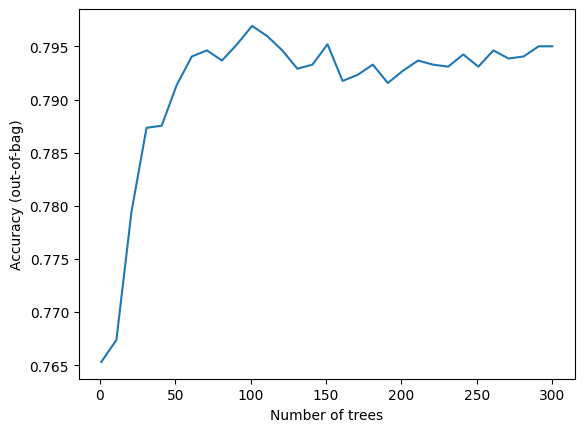

In [22]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

**Making Predictions from Test Dataset and Submission**

In [23]:
df_test = df_test.drop(['Name'], axis = 1)

df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [24]:
##handling null values
col_names = df_test.columns
#col_names[[1]]

for col_name in col_names:
    print('No. of null values in {} : {}'.format(col_name, df_test[col_name].isnull().sum()))

No. of null values in PassengerId : 0
No. of null values in HomePlanet : 87
No. of null values in CryoSleep : 93
No. of null values in Cabin : 100
No. of null values in Destination : 92
No. of null values in Age : 91
No. of null values in VIP : 93
No. of null values in RoomService : 82
No. of null values in FoodCourt : 106
No. of null values in ShoppingMall : 98
No. of null values in Spa : 101
No. of null values in VRDeck : 80


In [25]:
##separating out passenger ids for making prediction dataframe
submission_id = df_test.PassengerId
submission_id


0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [26]:
df_test = df_test.drop(['PassengerId'], axis = 1)
df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [27]:
## handling categorical variables
for col in cat_cols:
    df_test[col] = lb_en.fit_transform(df_test[col])
    
df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2784,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,1867,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,257,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,259,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,1940,2,20.0,0,10.0,0.0,635.0,0.0,0.0


In [28]:
## Converting into dataset for predictions
X_test = tf_df.keras.pd_dataframe_to_tf_dataset(df_test)

In [29]:
## Making predictions
y_pred = rf.predict(X_test)
predictions = (y_pred>0.5).astype(bool)

## Converting into dataframe for visualizing
df_pred = pd.DataFrame({'Passenger Id': submission_id, 'Transported': predictions.squeeze()})
df_pred.head()

5/5 [==============================] - 1s 95ms/step


,Passenger Id,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [30]:
## Modifing sample submission file for submission
df_sub = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
df_sub['Transported'] = predictions
df_sub.to_csv('/kaggle/working/submission.csv', index=False)
df_sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
